In [1]:
import requests
import json
import numpy as np
import pandas as pd


In [75]:
address = input("Enter the Belgium address: ") 

Enter the Belgium address: Beliestraat 62, 2910 Essen


In [76]:
def get_coordinates(address: str):
    req = requests.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
    info = {
                'x_value' : req['LocationResult'][0]['Location']['X_Lambert72'],
                'y_value' : req['LocationResult'][0]['Location']['Y_Lambert72'],
                'street' : req['LocationResult'][0]['Thoroughfarename'],
                'house_number' : req['LocationResult'][0]['Housenumber'], 
                'postcode': req['LocationResult'][0]['Zipcode'], 
                'municipality' : req['LocationResult'][0]['Municipality']}
    
    detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
                          params={"postcode": info['postcode'], 
                                  "straatnaam": info['street'],
                                  "huisnummer": info['house_number']}).json()
    building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    build = requests.get(building['gebouw']['detail']).json()
    info['polygon'] = [build['geometriePolygoon']['polygon']]
    return info


In [77]:
adress_coordination = get_coordinates(address)
adress_coordination 


{'x_value': 156943.0,
 'y_value': 239273.35,
 'street': 'Beliestraat',
 'house_number': '62',
 'postcode': '2910',
 'municipality': 'Essen',
 'polygon': [{'coordinates': [[[156936.52347204834, 239272.37130399048],
     [156946.09134405106, 239266.5967119895],
     [156947.9423520565, 239269.66371998936],
     [156946.24648005515, 239270.68784799054],
     [156947.27227205783, 239272.41955999285],
     [156948.93115205318, 239275.16208799556],
     [156941.04315204918, 239279.8984719962],
     [156936.52347204834, 239272.37130399048]]],
   'type': 'Polygon'}]}

In [13]:
import rasterio as rs
import numpy as np
dsm = rs.open("GeoTIFF/DHMVIIDSMRAS1m_k01.tif")
channel= dsm.read(1)



In [15]:
channel.shape


(9000, 17000)

In [98]:
left = []
buttom = []
right = []
top = []

left = dsm.bounds[0]
bottom = dsm.bounds[1]
right = dsm.bounds[2]
top = dsm.bounds[3]


In [64]:
dir(dem)

['AbortSQL',
 'AddBand',
 'AddFieldDomain',
 'AdviseRead',
 'BeginAsyncReader',
 'BuildOverviews',
 'ClearStatistics',
 'CommitTransaction',
 'CopyLayer',
 'CreateLayer',
 'CreateMaskBand',
 'DeleteLayer',
 'EndAsyncReader',
 'ExecuteSQL',
 'FlushCache',
 'GetDescription',
 'GetDriver',
 'GetFieldDomain',
 'GetFileList',
 'GetGCPCount',
 'GetGCPProjection',
 'GetGCPSpatialRef',
 'GetGCPs',
 'GetGeoTransform',
 'GetLayer',
 'GetLayerByIndex',
 'GetLayerByName',
 'GetLayerCount',
 'GetMetadata',
 'GetMetadataDomainList',
 'GetMetadataItem',
 'GetMetadata_Dict',
 'GetMetadata_List',
 'GetNextFeature',
 'GetProjection',
 'GetProjectionRef',
 'GetRasterBand',
 'GetRootGroup',
 'GetSpatialRef',
 'GetStyleTable',
 'GetSubDatasets',
 'GetTiledVirtualMem',
 'GetTiledVirtualMemArray',
 'GetVirtualMem',
 'GetVirtualMemArray',
 'RasterCount',
 'RasterXSize',
 'RasterYSize',
 'ReadAsArray',
 'ReadRaster',
 'ReadRaster1',
 'ReleaseResultSet',
 'ResetReading',
 'RollbackTransaction',
 'SetDescription

<ipython-input-12-6542b6cf7e33>:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


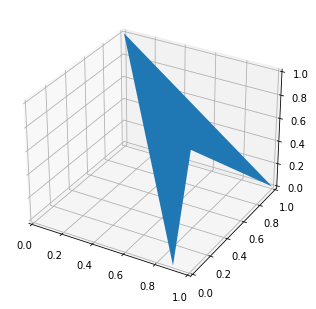

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
x = [0.9,1,1,0]
y = [0,0,1,1]
z = [0,1,0,1]
verts = [list(zip(x,y,z))]
ax.add_collection3d(Poly3DCollection(verts))
plt.show()


In [78]:
print(rs.transform.TransformMethodsMixin.index(dsm, 145000.0, 247000.0)) # left top
print(rs.transform.TransformMethodsMixin.index(dsm, 145000.0, 238000.0)) # left bottom
print(rs.transform.TransformMethodsMixin.index(dsm, 162000.0, 247000.0)) # right top
print(rs.transform.TransformMethodsMixin.index(dsm, 162000.0, 238000.0)) # right bottom
print('\n')
print(rs.transform.TransformMethodsMixin.index(dsm, 150000.0, 244000.0))

ind_row, ind_col = rs.transform.TransformMethodsMixin.index(dsm, 156943.0, 239273.35)
print(ind_row,ind_col)

(0, 0)
(9000, 0)
(0, 17000)
(9000, 17000)


(3000, 5000)
7726 11943


In [79]:
channel_slice = channel[ind_row - 10:ind_row+10,ind_col-10:ind_col+10]
channel_slice



array([[13.83, 13.87, 13.93, 13.94, 14.  , 14.13, 14.12, 14.12, 14.02,
        14.01, 13.98, 13.98, 13.91, 13.89, 13.84, 13.83, 13.84, 13.82,
        13.8 , 13.73],
       [15.32, 13.91, 13.96, 14.  , 14.07, 14.16, 14.16, 14.18, 14.13,
        14.05, 14.01, 14.04, 14.  , 13.94, 13.93, 13.85, 13.82, 13.88,
        13.85, 13.74],
       [13.87, 13.94, 14.03, 14.13, 14.17, 14.19, 14.22, 14.24, 14.19,
        14.17, 14.16, 14.1 , 14.05, 14.01, 13.98, 13.92, 13.89, 13.92,
        13.9 , 13.78],
       [13.94, 14.01, 14.05, 14.14, 14.22, 14.24, 14.19, 14.26, 14.26,
        14.22, 14.2 , 14.19, 14.13, 14.05, 14.04, 14.02, 14.  , 13.95,
        13.92, 13.84],
       [13.95, 14.04, 14.15, 14.17, 14.22, 14.28, 14.26, 16.07, 17.43,
        14.29, 14.24, 14.21, 14.19, 14.16, 14.07, 14.07, 14.06, 14.01,
        13.98, 13.95],
       [14.03, 14.16, 14.21, 14.19, 14.28, 14.3 , 14.32, 17.26, 17.95,
        18.64, 15.5 , 14.25, 14.2 , 14.2 , 14.2 , 14.16, 14.13, 14.07,
        15.06, 15.46],
       [14

In [48]:
nx = channel_slice.shape[0]
ny = channel_slice.shape[1]
nx
nx

200

(20, 20)

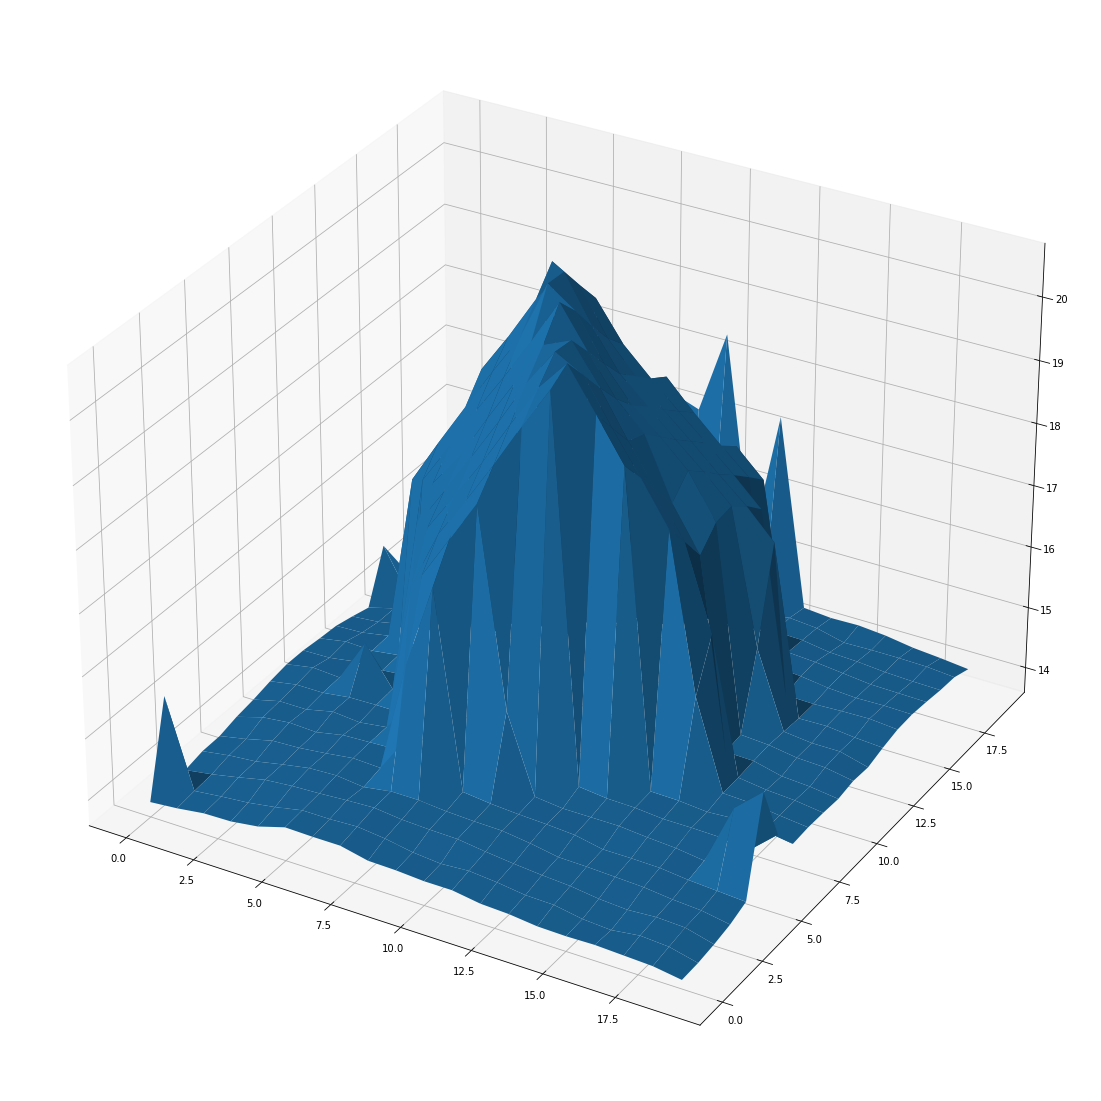

In [80]:
import matplotlib.pyplot as plt
nx = channel_slice.shape[1]
ny = channel_slice.shape[0]

x = range(nx)
y = range(ny)


X,Y = np.meshgrid(x,y)
hf = plt.figure(figsize=(20,20))
ha = hf.add_subplot(111,projection = '3d')

ha.plot_surface(X,Y,channel_slice)
X.shape
Y.shape

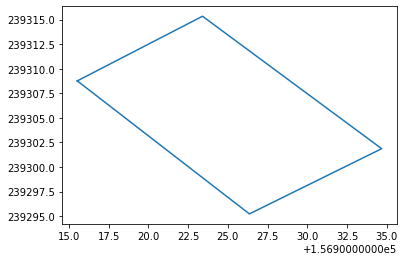

In [56]:
import matplotlib.pyplot as plt

coord = [[156915.5284000337, 239308.75927201658],
     [156926.3524640426, 239295.2331280075],
     [156934.67118404806, 239301.86506401375],
     [156923.40475203842, 239315.3311760202],
     [156915.5284000337, 239308.75927201658]]


xs, ys = zip(*coord) #create lists of x and y values
plt.figure()
plt.plot(xs,ys) 
plt.show() # if you need..

In [13]:
coord

[[155444.4075030163, 212110.6546132192],
 [155444.77691101283, 212110.87349321693],
 [155442.7674390152, 212113.99010121822],
 [155440.09467101097, 212112.3125332184],
 [155442.23860701174, 212109.17685321718],
 [155437.67835101485, 212106.069781214],
 [155436.93217501044, 212107.08808521554],
 [155430.99399900436, 212103.52597321197],
 [155430.4389910102, 212103.19304521382],
 [155430.59918300807, 212102.95893321186],
 [155435.17499101162, 212096.29998920858],
 [155446.34196701646, 212080.04699719697],
 [155445.23700701445, 212079.26798919588],
 [155461.11796702445, 212056.20802117884],
 [155467.10753503442, 212060.27336518466],
 [155466.59003103524, 212061.133845184],
 [155472.0987670347, 212065.15022918582],
 [155473.4071830362, 212066.1042131856],
 [155458.94971102476, 212087.21947720274],
 [155458.88916702569, 212087.30786120147],
 [155459.96622302383, 212087.99566920102],
 [155444.4075030163, 212110.6546132192],
 [155444.4075030163, 212110.6546132192]]

(0, 0)
(9000, 0)
(0, 17000)
(9000, 17000)


(3000, 5000)
